In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

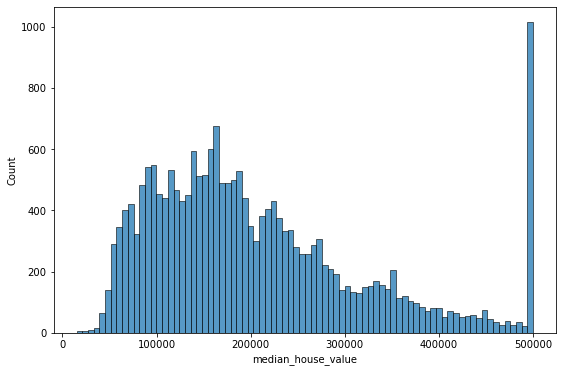

In [5]:
plt.figure(figsize=(9, 6))
sns.histplot(df.median_house_value, bins=80);

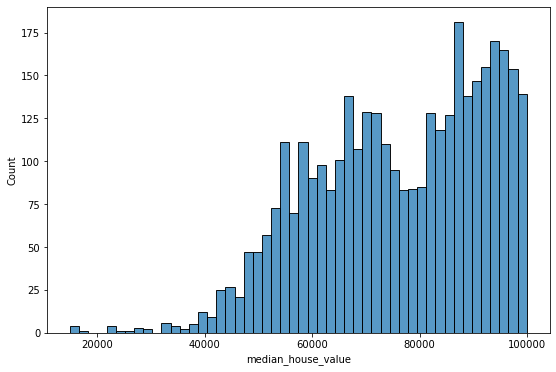

In [6]:
plt.figure(figsize=(9, 6))
sns.histplot(df.median_house_value[df.median_house_value < 100000], bins=50);

In [7]:
features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

In [8]:
df = df[features]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [9]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [10]:
df['population'].median()

1166.0

In [11]:
SEED = 42

In [12]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val, n_test)

assert n == (n_train + n_val + n_test)

20640 12384 4128 4128


In [13]:
idx = np.arange(n)

In [14]:
np.random.seed(seed=SEED)
np.random.shuffle(idx)

In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [16]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [17]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [21]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [22]:
del df_train['median_house_value'], df_val['median_house_value'], df_test['median_house_value']

In [23]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [24]:
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [25]:
base = list(df_train.columns.values)
base

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [26]:
def prepare_X(df, value=0):
    df_num = df[base]
    df_num = df_num.fillna(value)
    X = df_num.values
    return X

In [27]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [28]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [29]:
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [30]:
X_train = prepare_X(df_train, 0)

In [31]:
X_train.shape

(12384, 8)

In [32]:
w0, w = train_linear_regression(X_train, y_train)

In [33]:
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
score_zero = rmse(y_val, y_pred)
round(score_zero, 2)

0.33

In [34]:
mean_val = df_train['total_bedrooms'].mean()
mean_val

533.4803317730147

In [35]:
X_train = prepare_X(df_train, mean_val)
w0, w = train_linear_regression(X_train, y_train)

In [36]:
X_val = prepare_X(df_val, mean_val)
y_pred = w0 + X_val.dot(w)
score_mean = rmse(y_val, y_pred)
round(score_mean, 2)

0.33

In [37]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [38]:
scores = {}
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores[r] = round(score, 2)
    
    print(f'r={r}: w0={w0}, rmse={score}')

r=0: w0=-11.686975244261813, rmse=0.329533036523912
r=1e-06: w0=-11.686959178485989, rmse=0.3295330361644933
r=0.0001: w0=-11.68536886798924, rmse=0.3295330009701873
r=0.001: w0=-11.670931320653887, rmse=0.3295327038670615
r=0.01: w0=-11.528493588589239, rmse=0.32953193659943614
r=0.1: w0=-10.274500284140842, rmse=0.3296947205389722
r=1: w0=-4.9204808984587345, rmse=0.33378872199973053
r=5: w0=-1.4820957458165362, rmse=0.33924853455008347
r=10: w0=-0.7899311832581257, rmse=0.34060638078081384


In [39]:
scores

{0: 0.33,
 1e-06: 0.33,
 0.0001: 0.33,
 0.001: 0.33,
 0.01: 0.33,
 0.1: 0.33,
 1: 0.33,
 5: 0.34,
 10: 0.34}

In [40]:
print(f'The smallest r is {min(scores, key=scores.get)}.')

The smallest r is 0.


In [41]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [43]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed=seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value'], df_val['median_house_value'], df_test['median_house_value']
    
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(f'seed={seed}: w0={w0}, rmse={score}')
    scores.append(score)

std = np.std(scores)
print(f'std = {round(std, 3)}')

seed=0: w0=-11.900382140423538, rmse=0.3388430480535652
seed=1: w0=-11.732757375530449, rmse=0.33623872559537277
seed=2: w0=-11.806729362245843, rmse=0.3320912318835613
seed=3: w0=-11.587900350126908, rmse=0.3405153609030572
seed=4: w0=-11.389470590755955, rmse=0.3389024066565288
seed=5: w0=-11.447114275064546, rmse=0.343486672572002
seed=6: w0=-11.370516353469474, rmse=0.345198095309617
seed=7: w0=-12.473448923061865, rmse=0.3395989927432429
seed=8: w0=-11.800287430349286, rmse=0.3466230873196496
seed=9: w0=-11.45904683391947, rmse=0.33659261241436894
std = 0.004


In [44]:
SEED = 9

In [46]:
idx = np.arange(n)
np.random.seed(seed=SEED)
np.random.shuffle(idx)
    
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
    
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
    
del df_train['median_house_value'], df_val['median_house_value'], df_test['median_house_value']

In [47]:
df_full_train = pd.concat([df_train, df_val])

In [48]:
df_full_train = df_full_train.reset_index(drop=True)

In [49]:
X_full_train = prepare_X(df_full_train, 0)

In [50]:
y_full_train = np.concatenate([y_train, y_val])

In [51]:
X_full_train

array([[  38.67  , -121.8   ,   10.    , ..., 1073.    ,  378.    ,
           4.5526],
       [  33.66  , -117.97  ,   22.    , ..., 1871.    ,  607.    ,
           5.8541],
       [  40.28  , -124.25  ,   32.    , ...,  434.    ,  187.    ,
           1.9417],
       ...,
       [  33.93  , -118.13  ,   34.    , ..., 1578.    ,  488.    ,
           3.1496],
       [  34.11  , -118.37  ,   42.    , ..., 1863.    ,  957.    ,
           8.5842],
       [  34.08  , -118.37  ,   52.    , ...,  543.    ,  213.    ,
           6.0338]])

In [52]:
y_full_train

array([11.94730839, 12.54789128, 11.23981668, ..., 12.16473489,
       13.12236738, 12.9567833 ])

In [53]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [54]:
X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(f'RMSE_test = {round(score, 2)}')

RMSE_test = 0.35
